# Análise Exploratória - Dados de Reclamações

Resolva os exercícios propostos abaixo.

## Leitura e análise inicial dos dados

Abra o arquivo `../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv` que você criou no exercício de Limpeza de Dados e faça as análises e exibições iniciais do conteúdo.

Responda: Qual a média das idades das pessoas que reclamaram? Qual a idade máxima? Quantos valores únicos possuímos para a coluna `BAIRRO_ASS`?

**Dica:** A função len() pode ser usada para se obter o tamanho de listas, séries ou dataframes. Por exemplo, `len([1,3,9])` retorna 3.

In [2]:
# Resposta:
import pandas as pd
import matplotlib.pyplot as plt
### Aumentar o tamanho dos graficos
plt.rcParams["figure.figsize"] = (20,10)

df_bds = pd.read_csv("../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv", sep=',', encoding='UTF-8',  header='infer')
df_bairro = pd.read_csv("../data/dados_bairros.csv", sep=',', encoding='UTF-8',  header='infer')

In [17]:
df_bairro[df_bairro.Bairro.eq('Xaxim')].Bairro

2    Xaxim
Name: Bairro, dtype: object

In [18]:
df_bairro[df_bairro['Bairro'] == 'Xaxim']['Bairro']

2    Xaxim
Name: Bairro, dtype: object

In [2]:
#Qual a média das idades das pessoas que reclamaram?
df_bds['IDADE'].mean()

48.17157005534518

In [3]:
#Qual a idade máxima?
df_bds['IDADE'].max()

96

In [4]:
#Quantos valores únicos possuímos para a coluna BAIRRO_ASS?
len(df_bds['BAIRRO_ASS'].unique())

75

O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [5]:
# Resposta:
df_bds.sample(n=10)

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE
5570,2016-11-22,12:48:56,COLETA,pinheirinho,F,1953-10-22,"O contrato de Coleta de Vegetais, caliças e en...",12,63
4912,2016-12-23,08:57:44,ILUMINAÇÃO PÚBLICA,cajuru,M,1954-01-19,SOLICITACAO ATENDIDA,8,62
5660,2016-12-16,19:46:41,POLUIÇÃO,tatuquara,F,1959-03-16,Usuário SIMA: SOLICITACAO ENCAMINHADA A DIVISA...,19,57
2463,2017-09-01,13:59:48,ILUMINAÇÃO PÚBLICA,sao braz,M,1995-09-29,SOLICITACAO ATENDIDA,13,22
3239,2017-01-16,13:56:08,ILUMINAÇÃO PÚBLICA,novo mundo,M,1981-05-07,SOLICITACAO ATENDIDA,13,36
1180,2016-02-12,14:09:50,PRAÇAS,taruma,M,1947-03-12,SOLICITACAO ATENDIDA,14,69
2762,2016-11-23,10:41:59,TRÂNSITO,reboucas,M,1959-10-23,"Informamos que encaminhamos a viatura 235, às ...",10,57
3175,2016-10-11,22:03:48,ILUMINAÇÃO PÚBLICA,guaira,F,1943-10-08,Atendido,22,73
6162,2016-11-14,16:19:16,COLETA,portao,F,1963-05-13,"O contrato de Coleta de Vegetais, caliças e en...",16,53
897,2016-11-28,15:51:37,COLETA,bacacheri,M,1939-06-04,"O contrato de Coleta de Vegetais, caliças e en...",15,77


## Visualização da distribuição das variáveis

Exiba histogramas para visualizar a distribuição de idades para homens e mulheres.

Responda: Existe alguma diferença na distribuição das idades entre homens e mulheres?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E0DBF3788>]],
      dtype=object)

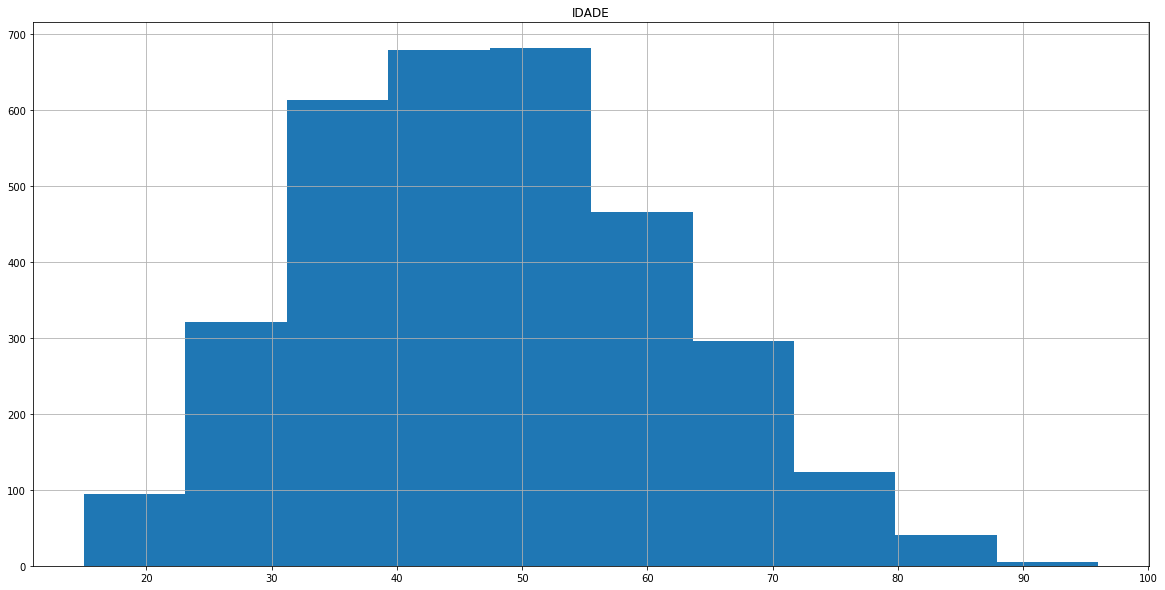

In [6]:
# Resposta:
df_bds[df_bds['SEXO'] == 'M'][['IDADE']].hist()

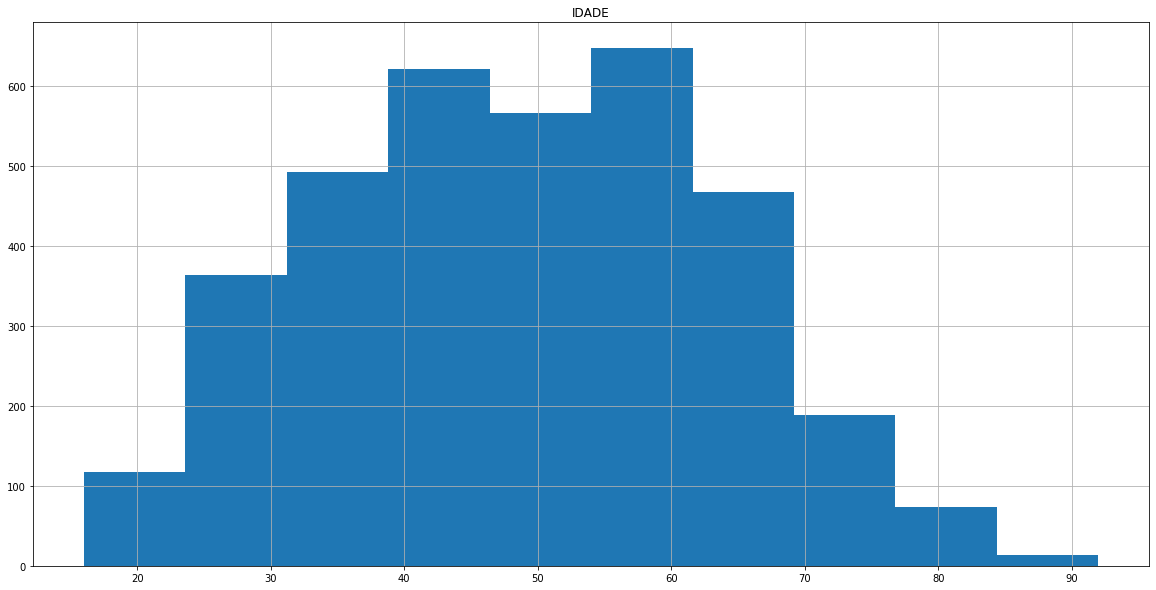

In [7]:
# Resposta:
axes = df_bds[df_bds['SEXO'] == 'F'][['IDADE']].hist()

In [8]:
#Existe alguma diferença na distribuição das idades entre homens e mulheres?

'''
A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.
A negative skewness value in the output indicates an asymmetry in the distribution corresponding to 
row 2 and the tail is larger towards the left hand side of the distribution.
A positive skewness value in the output indicates an asymmetry in the distribution corresponding to 
row 3 and the tail is larger towards the right hand side of the distribution.

'''


#Shape
i_skew_m = df_bds[df_bds['SEXO'] == 'M'][['IDADE']].skew()
i_skew_f = df_bds[df_bds['SEXO'] == 'F'][['IDADE']].skew()
print('Ambos os dataset parecem seguir uma distribuição normal de idades. \n' +
      'No entanto, o dataset masculino {} parece estar mais enviesado para a direita comparado ao feminino {}.'.format(str(i_skew_m),str(i_skew_f)))

Ambos os dataset parecem seguir uma distribuição normal de idades. 
No entanto, o dataset masculino IDADE    0.256714
dtype: float64 parece estar mais enviesado para a direita comparado ao feminino IDADE    0.07598
dtype: float64.


In [9]:
#Spread
i_max_m = df_bds[df_bds['SEXO'] == 'M'][['IDADE']].max()
i_min_m = df_bds[df_bds['SEXO'] == 'M'][['IDADE']].min()
i_max_f = df_bds[df_bds['SEXO'] == 'F'][['IDADE']].max()
i_min_f = df_bds[df_bds['SEXO'] == 'F'][['IDADE']].min()

print('O spread de idade masculino {} é maior comparado ao feminino {}'.format(i_max_m - i_min_m,i_max_f - i_min_f ))

O spread de idade masculino IDADE    81
dtype: int64 é maior comparado ao feminino IDADE    76
dtype: int64


Exiba um BoxPlot das idades de acordo com o sexo do reclamante para ver se as diferenças ficam mais óbvias. 

**Dica:** Para exibir boxplots agrupados por categoria, use o método `boxplot` como no exemplo: `df.boxplot(column='IDADE', by = 'SEXO')`.

Text(0, 0.5, 'Idade')

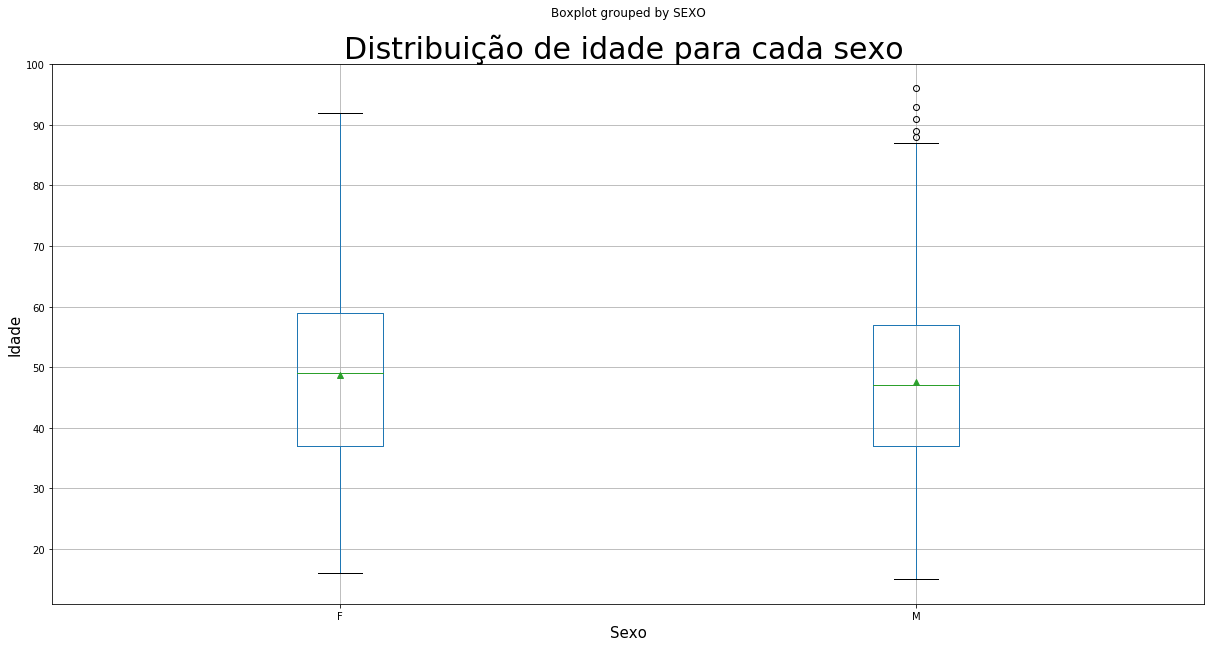

In [10]:
# Resposta:
axes = df_bds.boxplot(column='IDADE', by='SEXO', showmeans=True)
axes.set_title('Distribuição de idade para cada sexo ', size=30)
axes.set_xlabel("Sexo", size=15)
axes.set_ylabel("Idade", size=15)


## Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de relamação (assuntos) mais comuns.

- Faça uma contagem dos assuntos mais comuns (usando `groupby`). Revise o procedimento no tutorial de Manipulação e Agregação de Dados, se necessário.
- Crie uma lista contendo os assuntos com mais de 60 reclamações. Armazene a lista em uma variável para uso posterior.

**Dica:** Para criar uma lista a partir de uma coluna de valores, use o comando `list()` como no exemplo: `list(df_grouped_top['ASSUNTO'])`

In [11]:
# Resposta:
df_assunto = df_bds.groupby(['ASSUNTO'])[['ASSUNTO']].size().reset_index(name = 'COUNT')
df_assunto = df_assunto.sort_values(by=['COUNT'], ascending=False)

df_assunto

,ASSUNTO,COUNT
23,COLETA,1632
57,ILUMINAÇÃO PÚBLICA,992
132,TRÂNSITO,867
0,ABORDAGEM SOCIAL DE RUA - ADULTO,321
103,POSTO DE SAÚDE,309
...,...,...
117,RODOVIÁRIA,1
118,S.A.V CRIANÇA - ORIENTAÇÃO TELEFÔNICA,1
119,SACOLÃO DA FAMÍLIA,1
93,PATRIMÔNIO PÚBLICO,1


In [12]:
# Resposta:
df_assunto = df_assunto[df_assunto['COUNT'] > 60]
l_assunto = list(df_assunto['ASSUNTO'])
l_assunto

['COLETA',
 'ILUMINAÇÃO PÚBLICA',
 'TRÂNSITO',
 'ABORDAGEM SOCIAL DE RUA - ADULTO',
 'POSTO DE SAÚDE',
 'MOTORISTAS, COBRADORES E PORTEIROS',
 'DISQUE SOLIDARIEDADE',
 'POLUIÇÃO',
 'OUTROS SETORES SMS',
 'FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS',
 'ANIMAIS',
 'ANIMAIS DOMÉSTICOS',
 'SEMÁFORO',
 'ÁRVORE',
 'FAUNA SINANTRÓPICA',
 'DRENAGEM',
 'UNIDADE DE PRONTO ATENDIMENTO',
 'LIMPEZA']

Crie um novo DataFrame contendo apenas reclamações contidas na lista das reclamações mais comuns.

**Dica:** Para filtrar linhas que contêm valores de uma lista, use o método `isin()`. Por exemplo, `df['ASSUNTO'].isin(lista_top)` retorna uma lista de valores True/False que pode ser usada para selecionar as linhas de interesse.

In [13]:
# Resposta:
df_comuns = df_bds[df_bds['ASSUNTO'].isin(l_assunto)]
df_comuns.sample(n=5)

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE
3307,2016-10-11,15:06:02,ILUMINAÇÃO PÚBLICA,fanny,F,1968-02-17,Atendido,15,48
5791,2016-05-12,08:40:29,DRENAGEM,cidade industrial,M,1982-01-24,Preliminarmente cabe consignar que a Lei nº 12...,8,34
136,2016-01-11,20:08:20,TRÂNSITO,merces,F,1972-02-17,Informamos que o atendimento aos pedidos para ...,20,44
6411,2016-11-21,11:33:08,ÁRVORE,campo comprido,M,1960-02-23,Usuário SIMA: ENCAMINHADO PARA VISTORIA E AVAL...,11,56
4230,2016-11-22,17:43:42,SEMÁFORO,boqueirao,F,1965-09-02,Informamos que a equipe de manutenção esteve n...,17,51


## Análise de similaridades entre reclamações de bairros

Queremos agora identificar bairros com problemas similares. Use o método `crosstab()` para gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas. 

In [14]:
# Resposta:
df_similaridades = pd.crosstab(df_comuns['ASSUNTO'], df_comuns['BAIRRO_ASS'])
df_similaridades

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,...,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
ASSUNTO,,,,,,,,,,,,,,,,,,,,,
ABORDAGEM SOCIAL DE RUA - ADULTO,2,8,4,3,5,6,2,0,7,2,...,4,0,0,1,1,0,0,0,1,0
ANIMAIS,0,0,1,7,1,0,0,2,1,2,...,7,0,0,5,1,8,3,1,3,2
ANIMAIS DOMÉSTICOS,1,1,0,4,0,0,0,0,3,5,...,7,0,0,4,0,10,1,0,0,7
COLETA,15,41,17,31,4,13,7,4,34,86,...,60,1,28,19,13,47,5,7,26,47
DISQUE SOLIDARIEDADE,1,4,2,5,0,4,1,0,2,4,...,9,1,0,2,2,3,2,1,4,6
DRENAGEM,0,1,0,5,0,0,2,0,2,0,...,5,0,1,2,2,5,2,1,1,3
FAUNA SINANTRÓPICA,1,2,0,2,2,1,0,0,2,1,...,6,0,0,1,1,3,1,0,1,4
FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS,1,13,1,2,0,2,1,1,0,0,...,7,0,0,3,0,9,2,0,2,4
ILUMINAÇÃO PÚBLICA,12,22,9,29,5,11,12,2,21,26,...,45,3,14,22,4,38,7,4,8,36


Usando o DataFrame obtido anteriormente, gere a matriz de correlações entre bairros (método `corr()`).

In [15]:
# Resposta:
df_similaridades.corr()

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,...,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,
abranches,1.000000,0.643055,0.884902,0.970722,0.123024,0.791709,0.794544,0.777465,0.874166,0.903948,...,0.963485,0.465605,0.907070,0.883269,0.844186,0.954435,0.678211,0.624121,0.854907,0.975221
agua verde,0.643055,1.000000,0.858102,0.623982,0.741225,0.872836,0.791846,0.457873,0.797828,0.637879,...,0.587818,0.204879,0.812256,0.517301,0.634941,0.653743,0.781724,0.907642,0.687336,0.670143
ahu,0.884902,0.858102,1.000000,0.848473,0.389906,0.914807,0.807990,0.714865,0.935760,0.886528,...,0.852842,0.358148,0.955636,0.693846,0.852803,0.870747,0.737892,0.818051,0.917330,0.860442
alto boqueirao,0.970722,0.623982,0.848473,1.000000,0.156873,0.759529,0.817464,0.774408,0.831386,0.854039,...,0.934172,0.446280,0.876565,0.902115,0.832988,0.952150,0.756346,0.648789,0.819032,0.972161
alto da gloria,0.123024,0.741225,0.389906,0.156873,1.000000,0.489287,0.515642,-0.098966,0.419315,0.067272,...,0.074968,-0.087167,0.303575,0.126778,0.150834,0.118885,0.521474,0.684358,0.111794,0.177159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uberaba,0.954435,0.653743,0.870747,0.952150,0.118885,0.750817,0.788739,0.832935,0.851041,0.888634,...,0.960357,0.433171,0.906221,0.890315,0.787015,1.000000,0.764711,0.654870,0.871909,0.942704
umbara,0.678211,0.781724,0.737892,0.756346,0.521474,0.736560,0.889417,0.585468,0.702908,0.542919,...,0.662525,0.440778,0.728206,0.703325,0.529311,0.764711,1.000000,0.829250,0.620305,0.720214
vila izabel,0.624121,0.907642,0.818051,0.648789,0.684358,0.774724,0.776734,0.439727,0.786965,0.633023,...,0.592859,0.257679,0.780455,0.545508,0.643710,0.654870,0.829250,1.000000,0.681306,0.690296


Use um Heatmap para exibir as correlações com cores.

In [16]:
# Resposta:
df_similaridades.corr().style.background_gradient(cmap='RdBu')

### Legenda
## correlações mais altas possuem cor azul forte, enquanto as mais baixas tendem ao vermelho.

É possível perceber algum padrão entre os bairros baseando-se nas correlações obtidas?

==> Dificil dizer, algumas correlações parecem não serem claras. Por exemplo Abranches e Alto Boqueirão parecem estar fortemente correlacionados, no entanto, ao somar o numero de reclamações de cada bairro, o valor é bem divergente.

## Análise de bairros mais problemáticos

Agora nosso interesse é determinar os bairros com mais reclamações.

- Crie um DataFrame com a contagem de reclamações por bairro (usando a coluna BAIRRO_ASS).
- Exiba os dados usando um gráfico de barras para visualizarmos os bairros com mais reclamações

In [17]:
# Resposta:
df_reclamacoes_by_bairro = df_comuns.groupby(['BAIRRO_ASS'])[['ASSUNTO']].size().reset_index(name = 'COUNT')
df_reclamacoes_by_bairro = df_reclamacoes_by_bairro.sort_values(by=['COUNT'], ascending=False)

df_reclamacoes_by_bairro

,BAIRRO_ASS,COUNT
29,cidade industrial,319
27,centro,318
19,cajuru,265
15,boqueirao,214
65,sitio cercado,212
...,...,...
25,cascatinha,8
26,caximba,3
63,sao miguel,2
54,riviera,1


Text(0, 0.5, 'Qtd. Reclamações')

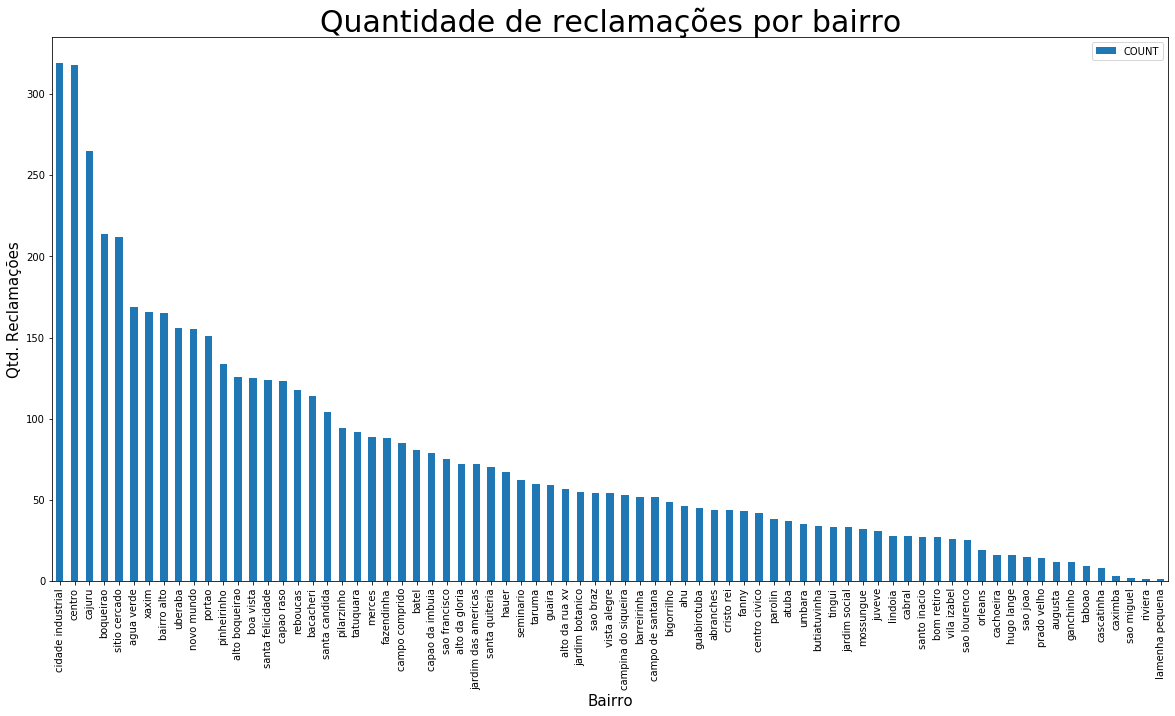

In [18]:
# Resposta:

axes = df_reclamacoes_by_bairro.plot.bar(x='BAIRRO_ASS')
axes.set_title('Quantidade de reclamações por bairro', size=30)
axes.set_xlabel("Bairro", size=15)
axes.set_ylabel("Qtd. Reclamações", size=15)


O problema de considerar apenas o total de reclamações é que não estamos considerando a população dos bairros. Então o ideal é calcular a *taxa* de reclamações, ou seja, o número de reclamações por habitante do bairro.

- Crie um novo DataFrame a partir dos dados do arquivo `../data/dados_bairros.csv`.
- Converta os nomes dos bairros deste DataFrame para caixa-baixo (minúsculo).
- Faça uma junção do DataFrame de totais por bairro com o novo DataFrame.

**Dica:** Para especificar as colunas contendo os valores base para a junção, especifique os parâmetros `left_on` e `right_on` no método `merge`.

In [19]:
# Resposta:
df_bairro['Bairro'] = df_bairro['Bairro'].str.lower()
df_juncao = df_reclamacoes_by_bairro.merge(df_bairro, left_on='BAIRRO_ASS', right_on='Bairro')
df_juncao = df_juncao[['Bairro', 'AreaKm2', 'Homens', 'Mulheres', 'Total', 'Domicilios', 'RendimentoDom', 'COUNT']]

df_juncao


,Bairro,AreaKm2,Homens,Mulheres,Total,Domicilios,RendimentoDom,COUNT
0,cidade industrial,"43,38",76942,80519,157461,43494,"639,09",319
1,centro,"3,3",13961,18662,32623,14576,"2221,51",318
2,cajuru,"11,55",43727,46057,89784,14301,"793,75",265
3,boqueirao,"14,8",33158,35337,68495,19750,"1413,53",214
4,sitio cercado,"11,12",50631,51779,102410,27914,"934,95",212
...,...,...,...,...,...,...,...,...
67,cascatinha,"2,57",994,1067,2061,586,"2198,43",8
68,caximba,"8,17",1252,1223,2475,631,"525,34",3
69,sao miguel,7,2512,2399,4911,1247,"409,43",2
70,riviera,"2,36",100,103,203,62,"423,13",1


Crie uma nova coluna chamada *taxa* contendo o resultado da divisão da coluna de contagem de reclamações pela coluna de total de habitantes.

In [20]:
# Resposta:
df_juncao['Taxa'] = df_juncao['COUNT'] / df_juncao['Total']
df_juncao = df_juncao.sort_values(by=['Taxa'], ascending=False)
df_juncao

#Taxa é a quantidade de reclamações por habitante

,Bairro,AreaKm2,Homens,Mulheres,Total,Domicilios,RendimentoDom,COUNT,Taxa
26,alto da gloria,"0,88",2513,3075,5588,2125,"3263,47",72,0.012885
25,sao francisco,"1,36",2863,3572,6435,2198,"2309,05",75,0.011655
1,centro,"3,3",13961,18662,32623,14576,"2221,51",318,0.009748
32,jardim botanico,"2,77",2813,3340,6153,1980,"1885,75",55,0.008939
44,centro civico,"0,97",2029,2738,4767,1958,"2878,11",42,0.008811
...,...,...,...,...,...,...,...,...,...
38,bigorrilho,"3,5",12359,14768,27127,9937,"3792,68",49,0.001806
65,ganchinho,"11,2",3667,3658,7325,1921,"767,35",12,0.001638
71,lamenha pequena,"3,4",353,348,701,188,"665,99",1,0.001427
68,caximba,"8,17",1252,1223,2475,631,"525,34",3,0.001212


Exiba um gráfico de barras mostrando os bairros de acordo com a taxa de reclamações.

Text(0, 0.5, 'Taxa de Reclamações (Rec. por Habitante)')

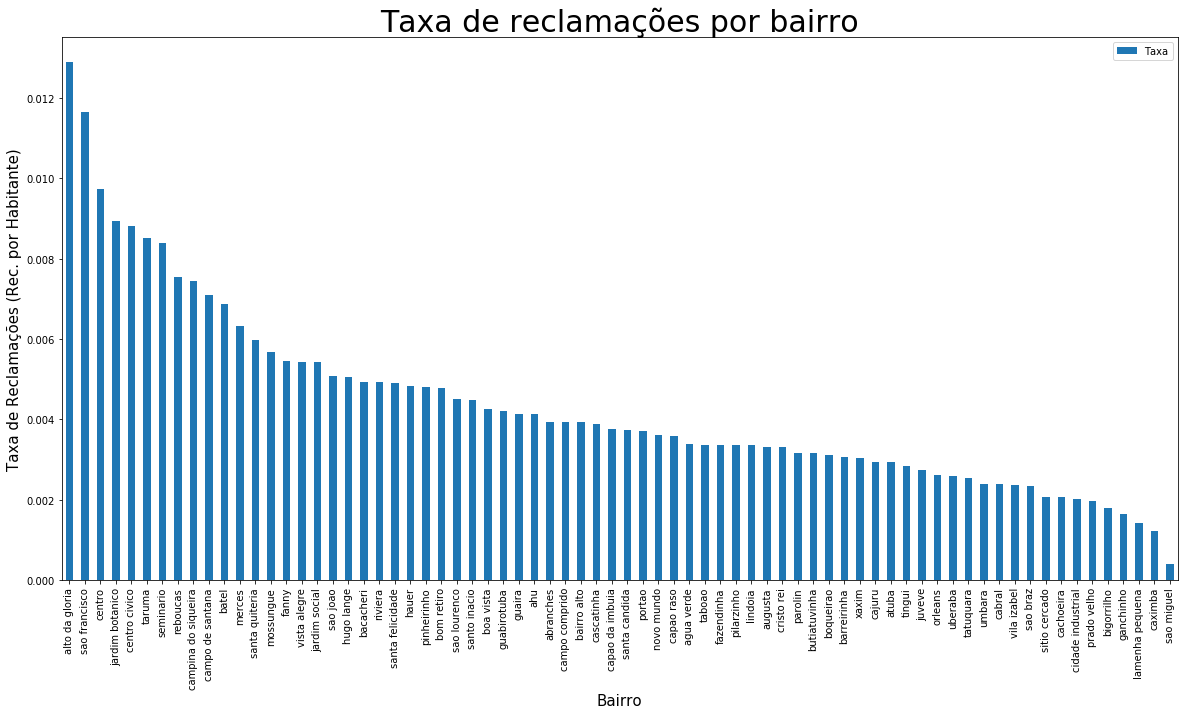

In [21]:
# Resposta:
axes = df_juncao.plot.bar(x='Bairro', y='Taxa')

axes.set_title('Taxa de reclamações por bairro', size=30)
axes.set_xlabel("Bairro", size=15)
axes.set_ylabel("Taxa de Reclamações (Rec. por Habitante)", size=15)

## Analisando tendências temporais

Vamos agora identificar os meses com mais reclamações. 

- Usando o DataFrame completo (lido a partir do CSV), converta a coluna *DATA* para o tipo `datetime`. Revise o tutorial de Limpeza de Dados se necessário.
- Agrupe as linhas contando as reclamações por mês. Revise o tutorial de Análise Exploratória se necessário.
- Exiba um gráfico de linha com a evolução da contagem.


In [40]:
# Resposta:

df_bds_all = df_bds.copy()  #Copiando o dataset para nao alterar o df inicial

df_bds_all['DATA'] = df_bds_all['DATA'].astype('datetime64[ns]')
df_bds_all['MES_STR'] = df_bds_all['DATA'].dt.month_name()
df_bds_all['MES_ANO'] = df_bds_all['DATA'].dt.to_period("M") 

df_bds_all_by_month = df_bds_all.groupby(['MES_ANO', 'MES_STR'])[['ASSUNTO']].size().reset_index(name = 'COUNT')
df_bds_all_by_month = df_bds_all_by_month.sort_values(by=['MES_ANO'], ascending=True)
df_bds_all_by_month

,MES_ANO,MES_STR,COUNT
0,2016-01,January,216
1,2016-02,February,145
2,2016-03,March,182
3,2016-04,April,138
4,2016-05,May,231
5,2016-06,June,178
6,2016-07,July,279
7,2016-08,August,265
8,2016-09,September,233
9,2016-10,October,190


Text(0, 0.5, 'Qtd. Reclamações')

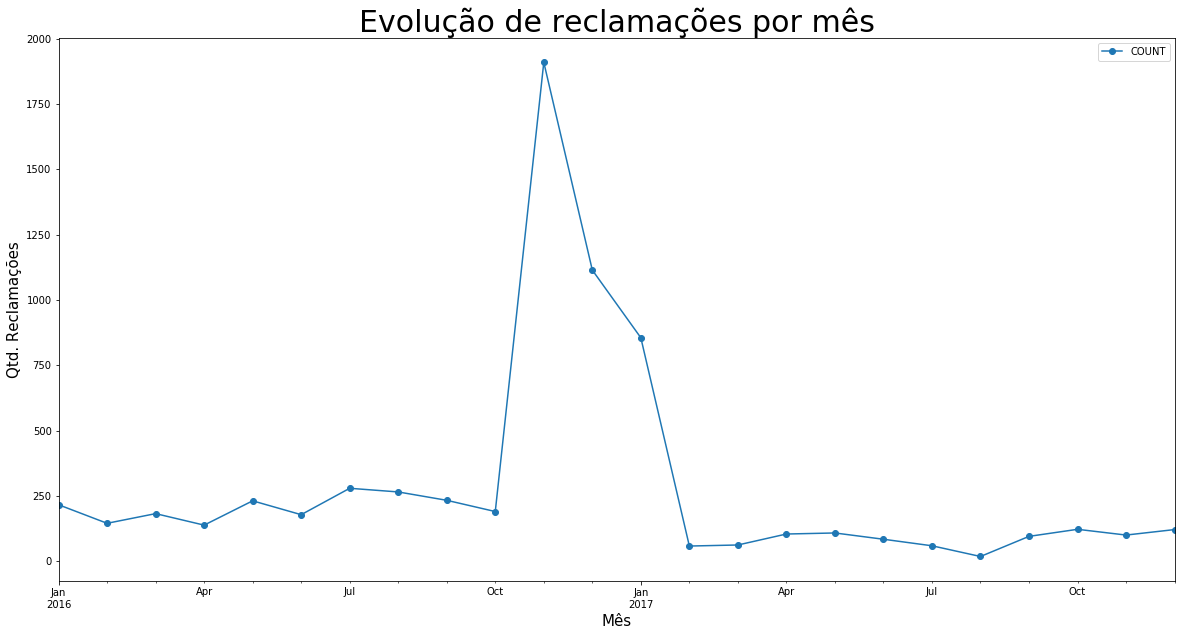

In [41]:
# Resposta:
axes = df_bds_all_by_month.plot(x ='MES_ANO', y='COUNT', kind = 'line', style=['o-'])

axes.set_title('Evolução de reclamações por mês', size=30)
axes.set_xlabel("Mês", size=15)
axes.set_ylabel("Qtd. Reclamações", size=15)


---

title: 03e1-Exercício-Pandas_Análise Exploratória

author: Melchiades Blanco Junior

date: Apr 17, 2021

---
